In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'C:/Users/dipay/Downloads/PL_data.csv'
data = pd.read_csv(file_path)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [3]:
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


In [4]:
print("\nSummary Statistics")
print(data.describe(include='all'))


Summary Statistics
        Div     Date    HomeTeam   AwayTeam        FTHG        FTAG  FTR  \
count   380      380         380        380  380.000000  380.000000  380   
unique    1      108          20         20         NaN         NaN    3   
top      E0  12/5/19  Man United  Leicester         NaN         NaN    H   
freq    380       10          19         19         NaN         NaN  181   
mean    NaN      NaN         NaN        NaN    1.568421    1.252632  NaN   
std     NaN      NaN         NaN        NaN    1.312836    1.180031  NaN   
min     NaN      NaN         NaN        NaN    0.000000    0.000000  NaN   
25%     NaN      NaN         NaN        NaN    1.000000    0.000000  NaN   
50%     NaN      NaN         NaN        NaN    1.000000    1.000000  NaN   
75%     NaN      NaN         NaN        NaN    2.000000    2.000000  NaN   
max     NaN      NaN         NaN        NaN    6.000000    6.000000  NaN   

              HTHG        HTAG  HTR  ...         HST         AST   

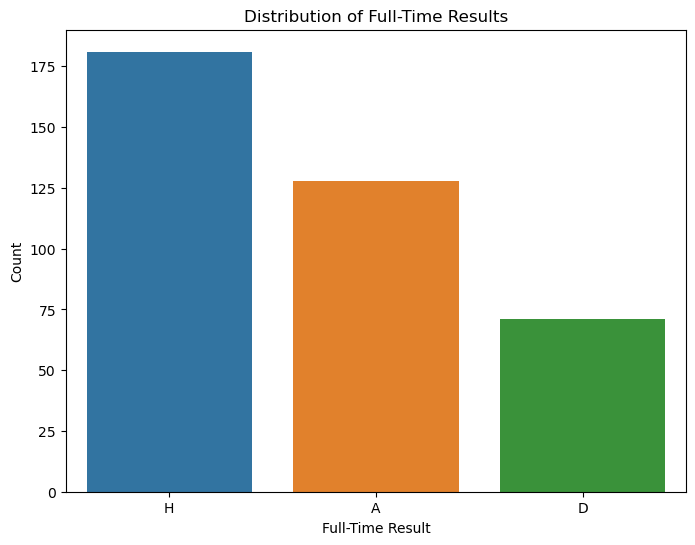

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='FTR', data=data)
plt.title('Distribution of Full-Time Results')
plt.xlabel('Full-Time Result')
plt.ylabel('Count')
plt.show()

C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


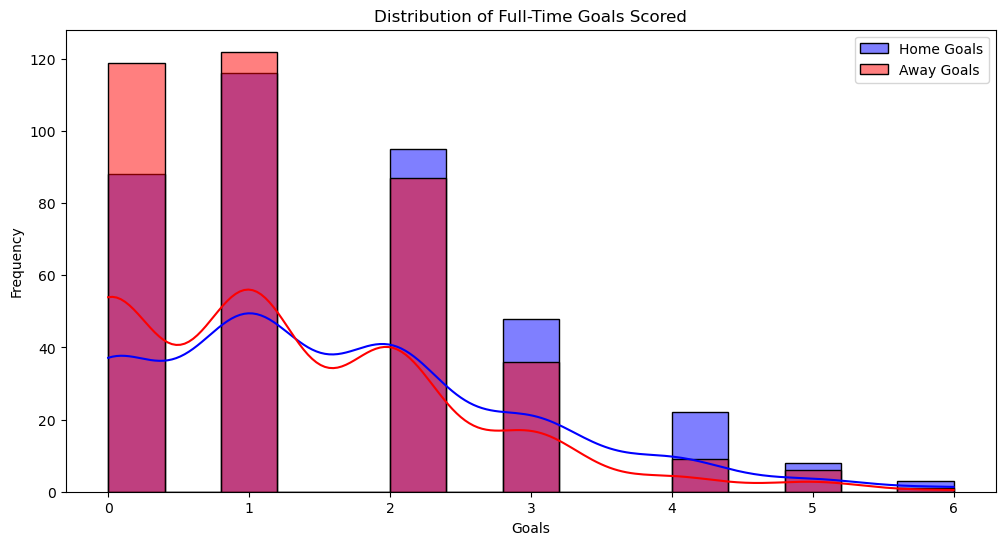

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(data['FTHG'], kde=True, color='blue', label='Home Goals', bins=15)
sns.histplot(data['FTAG'], kde=True, color='red', label='Away Goals', bins=15)
plt.title('Distribution of Full-Time Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [7]:
avg_fouls = data[['HF', 'AF']].mean()
print("\nAverage Number of Fouls")
print(avg_fouls)


Average Number of Fouls
HF    10.152632
AF    10.305263
dtype: float64


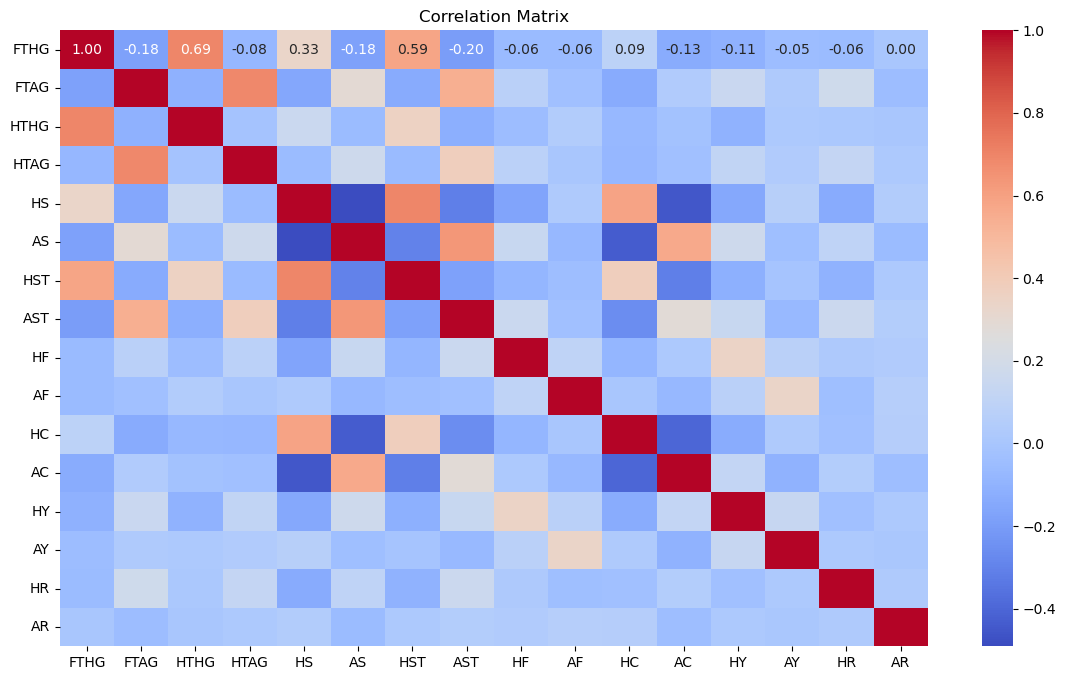

In [8]:
corr_matrix = data.select_dtypes(include='number').corr()


plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

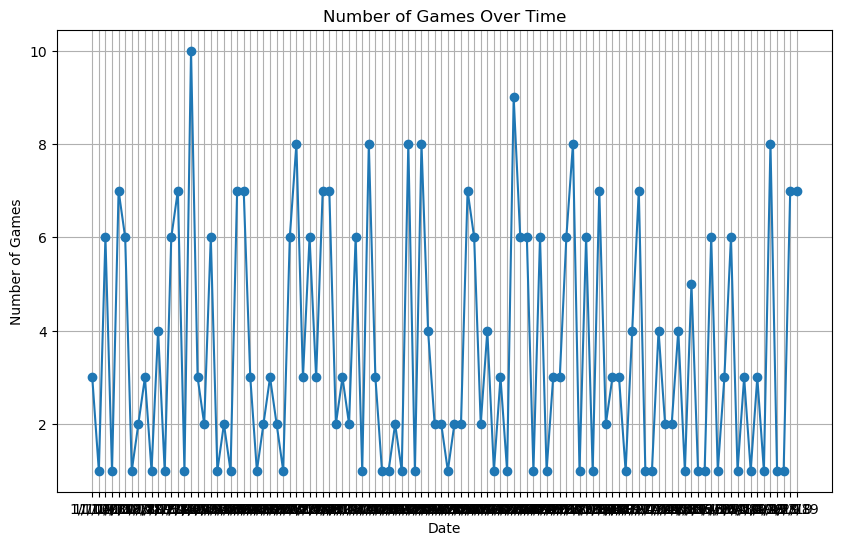

In [9]:
games_per_date = data.groupby('Date').size()

plt.figure(figsize=(10, 6))
plt.plot(games_per_date.index, games_per_date.values, marker='o')
plt.title('Number of Games Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()


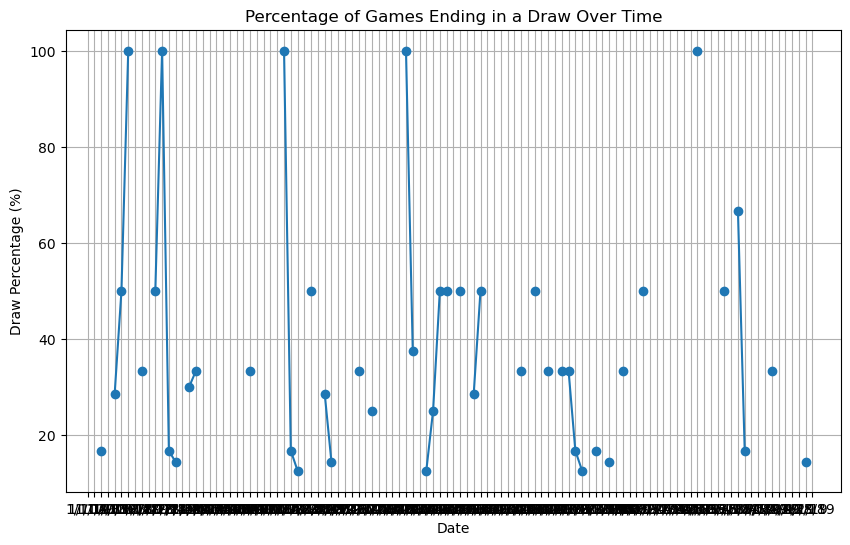

In [10]:
draw_games = data[data['FTR'] == 'D']
draw_percentage = (draw_games.groupby('Date').size() / data.groupby('Date').size()) * 100

plt.figure(figsize=(10, 6))
plt.plot(draw_percentage.index, draw_percentage.values, marker='o')
plt.title('Percentage of Games Ending in a Draw Over Time')
plt.xlabel('Date')
plt.ylabel('Draw Percentage (%)')
plt.grid(True)
plt.show()

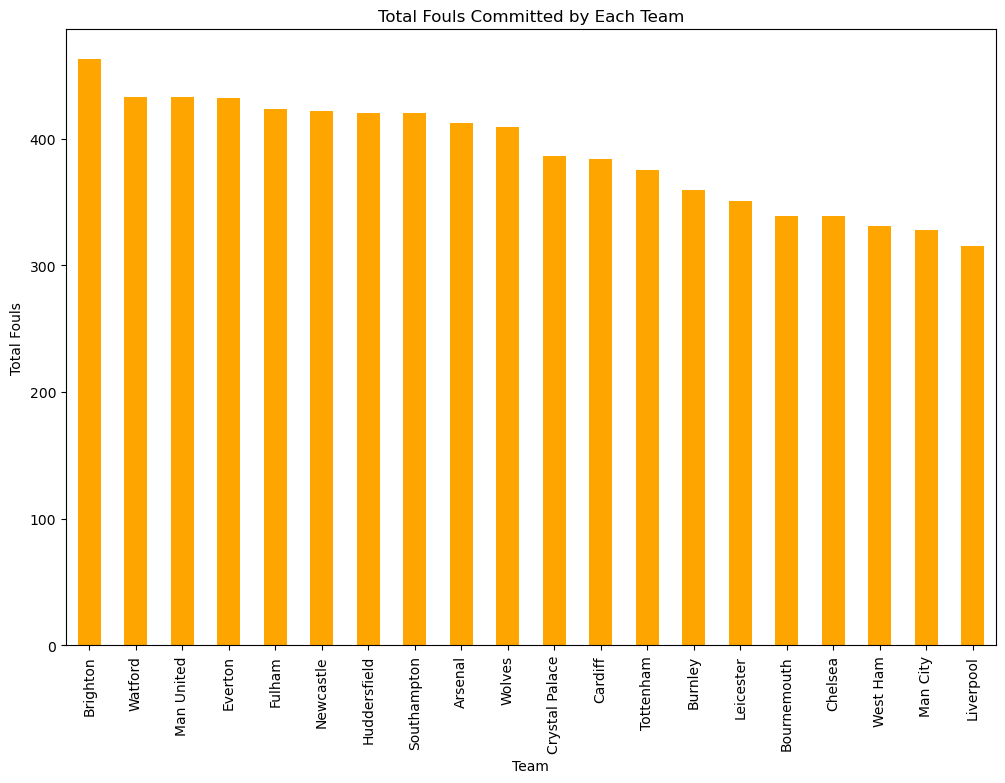

In [11]:
fouls_by_team = data.groupby('HomeTeam')['HF'].sum() + data.groupby('AwayTeam')['AF'].sum()
fouls_by_team_sorted = fouls_by_team.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
fouls_by_team_sorted.plot(kind='bar', color='orange')
plt.title('Total Fouls Committed by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Fouls')
plt.xticks(rotation=90)
plt.show()

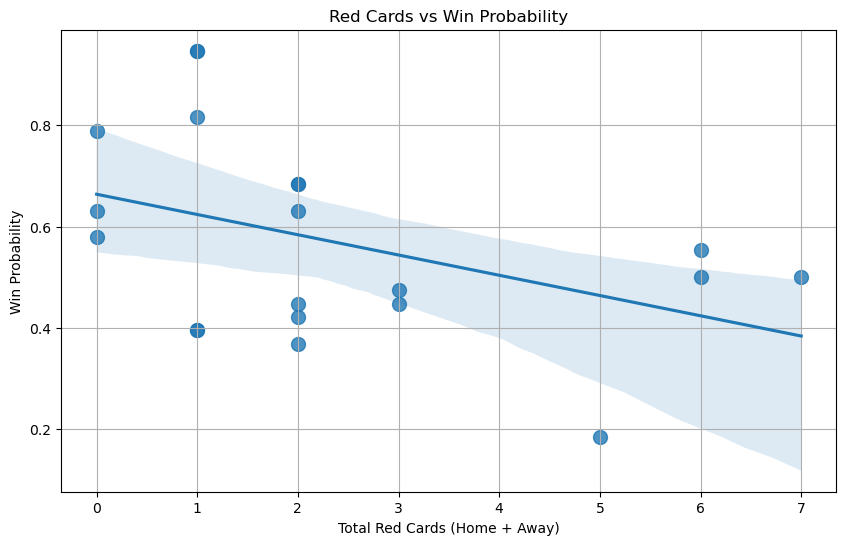

In [12]:
data['Win'] = data['FTR'].apply(lambda x: 1 if x == 'H' else (0 if x == 'A' else 0.5))
red_cards = data.groupby('HomeTeam')[['HR', 'AR']].sum()
win_prob = data.groupby('HomeTeam')['Win'].mean()

plt.figure(figsize=(10, 6))
sns.regplot(x=red_cards['HR'] + red_cards['AR'], y=win_prob, scatter_kws={'s': 100})
plt.title('Red Cards vs Win Probability')
plt.xlabel('Total Red Cards (Home + Away)')
plt.ylabel('Win Probability')
plt.grid(True)
plt.show()